# Analisis para Colombia

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FixedLocator, MultipleLocator
import locale
plt.style.use('Solarize_Light2')
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8');

## Dataset
## INS - Instituro Nacional de Salud

In [68]:
# CARGAMOS EL DATASET DE COVID-19 COLOMBIA Y LA LISTA CON MUNICIPIOS PDET
url = 'https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD'
url2 = 'http://saludata.saludcapital.gov.co/osb/datos_abiertos_osb/enf-transmisibles/OSB_EnfTransm-COVID-19.csv'
pdet = pd.read_csv('data/MunicipiosPDET.csv')
censo = pd.read_csv('data/censo_municipal2018.csv')
datos = pd.read_csv(url)
bog = pd.read_csv(url2,encoding='iso-8859-1', sep=';', skiprows=4,skipfooter=2, parse_dates=['Fecha de diagnóstico'], dayfirst=True)
bog.tail()

ID de caso Fecha de diagnóstico Ciudad de residencia  \
27922       27923           2020-06-28               Bogotá   
27923       27924           2020-06-28               Bogotá   
27924       27925           2020-06-28               Bogotá   
27925       27926           2020-06-28               Bogotá   
27926       27927           2020-06-26               Bogotá   

      Localidad de residencia  Edad Sexo Tipo de caso Ubicación    Estado  
27922                Sin Dato    45    F   En estudio      Casa  Moderado  
27923                Sin Dato    87    M   En estudio      Casa  Moderado  
27924                Sin Dato    69    M   En estudio      Casa  Moderado  
27925                Sin Dato    86    M   En estudio      Casa  Moderado  
27926                Sin Dato    47    M   En estudio      Casa  Moderado

## Variables de interes
### CASOS
1. fecha de reporte web
### MUERTES
2. Fecha de muerte

In [70]:
datos['Fecha de muerte'] = pd.to_datetime(datos['Fecha de muerte'])
datos['fecha reporte web'] = pd.to_datetime(datos['fecha reporte web'])
bog['Fecha de diagnóstico'] = pd.to_datetime(bog['Fecha de diagnóstico'])

In [72]:
muertes = datos.groupby(['Fecha de muerte','Ciudad de ubicación'])['ID de caso'].count().unstack().fillna(0)
muertes_acumuladas = muertes.cumsum()

casos = datos.groupby(['fecha reporte web','Ciudad de ubicación'])['ID de caso'].count().unstack().fillna(0)
casos_acumulados = casos.cumsum()

bog_casos = bog.groupby(['Fecha de diagnóstico','Localidad de residencia'])['ID de caso'].count().unstack().fillna(0)
bog_casos_acu = bog_casos.cumsum()
casos_acumulados.tail()

Ciudad de ubicación  Acacías  Acandí  Acevedo  Agrado  Agua de Dios  \
fecha reporte web                                                     
2020-06-24              26.0     0.0      2.0     2.0           4.0   
2020-06-25              26.0     0.0      2.0     2.0           4.0   
2020-06-26              26.0     0.0      2.0     2.0           4.0   
2020-06-27              30.0     0.0      2.0     2.0           4.0   
2020-06-28              30.0     1.0      2.0     2.0           4.0   

Ciudad de ubicación  Aguachica  Aguadas  Aguazul  Agustín Codazzi  Aipe  ...  \
fecha reporte web                                                        ...   
2020-06-24                28.0      1.0      5.0             66.0   4.0  ...   
2020-06-25                31.0      1.0      5.0             66.0   4.0  ...   
2020-06-26                31.0      1.0      5.0             66.0   4.0  ...   
2020-06-27                36.0      1.0      5.0             68.0   4.0  ...   
2020-06-28                36.0      1.0      5.0             72.0   4.0  ...   

Ciudad de ubicación  Yolombó  Yopal  Yotoco  Yumbo  Zambrano  Zarzal  Zipacón  \
fecha reporte web                                                               
2020-06-24               3.0   44.0     4.0  123.0       1.0     2.0      4.0   
2020-06-25               3.0   47.0     4.0  127.0       1.0     2.0      4.0   
2020-06-26               3.0   47.0     4.0  128.0       1.0     2.0      4.0   
2020-06-27               3.0   48.0     6.0  131.0       1.0     3.0      4.0   
2020-06-28               3.0   48.0     6.0  132.0       1.0     3.0      4.0   

Ciudad de ubicación  Zipaquirá  Zona Bananera  Ábrego  
fecha reporte web                                      
2020-06-24                99.0           18.0     1.0  
2020-06-25               110.0           18.0     1.0  
2020-06-26               117.0           19.0     1.0  
2020-06-27               120.0           19.0     1.0  
2020-06-28               128.0           20.0     1.0  

[5 rows x 612 columns]

Organizemos el dataframe por orden de cantidad de casos o muertes

In [74]:
#casos_acumulados = casos_acumulados.sort_values(axis=1, by=casos_acumulados.index[-1], ascending=False)
#muertes_acumuladas = muertes_acumuladas.sort_values(axis=1, by=muertes_acumuladas.index[-1], ascending=False)
#bog_casos_acu = bog_casos_acu.sort_values(axis=1, by=bog_casos_acu.index[-1], ascending=False)
#casos = casos.sort_values(axis=1, by=casos.index[-1], ascending=False)
#muertes = muertes.sort_values(axis=1, by=muertes.index[-1], ascending=False)
#bog_casos = bog_casos[bog_casos_acu.columns]
#casos = casos[casos_acumulados.columns]
#muertes = muertes[muertes_acumuladas.columns]
#bog_casos_acu.tail()

In [76]:
#casos_acumulados.reset_index(inplace=True)
#muertes_acumuladas.reset_index(inplace=True)
#casos.reset_index(inplace=True)
#muertes.reset_index(inplace=True)
#bog_casos_acu.reset_index(inplace=True)
#bog_casos.reset_index(inplace=True)
#muertes_acumuladas.tail()
#casos_acumulados.tail()

In [78]:
#ciudades_casos = casos_acumulados.columns[1:6]
#ciudades_muertes = muertes_acumuladas.columns[1:6]
#casos_acumulados[ casos_acumulados.iloc[:,5] >= 3000 ].iloc[:,5].head(1).index[0]

In [80]:
def rollingCases(df, cases, cantidad):
    df_append = pd.DataFrame()
    df = df.rolling(7, min_periods=1, win_type='gaussian').mean(std=2)
    #df.iloc[-7:-1,:] = df.iloc[-7:-1,:].rolling(7, min_periods=1, win_type='gaussian').mean(std=3)
    #df2.combine_first(df)
    #casos_acumulados.sort_values(axis=1, by=casos_acumulados.index[-1], ascending=False)
    df = df.sort_values(axis=1, by=df.index[-1], ascending=False).reset_index(drop=True)
    for ciudad in range(cantidad):
        df_temp = pd.DataFrame()
        # Se toma el indice desde que los casos superan X cantidad
        first_value = df[ df.iloc[:,ciudad] >= cases ].iloc[:,ciudad].head(1)
        if not first_value.empty:
            idx = first_value.index[0]
            df_temp['datos'] = df.iloc[idx:,ciudad]
            df_temp['ciudad'] = df.columns[ciudad]
            df_temp.reset_index(inplace=True)
            df_append = pd.concat([df_append, df_temp])
    return df_append


In [82]:
sns.set()
#plt.style.context('Solarize_Light2')
def graficar(df,titulo,xlabel,ylabel,texto):
    text = []
    ciudades = df['ciudad'].unique()
    #plt.style.use('fivethirtyeight')
    #plt.style.use('ggplot')
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(16,9), dpi=500)
    plt.margins(0.005,0.05)
    for ciudad in ciudades:
        if not ciudad == 'Sin Dato':
            y = df[df['ciudad']==ciudad]['datos']
            fig = sns.lineplot(x = y.index, y = y, data = df, legend=False)  
            if ciudad == 'Bogotá D.C.':
                ciudad = 'Bogotá'
            elif ciudad == 'San Andrés de Tumaco':
                ciudad = 'Tumaco'
            elif ciudad == 'Cartagena de Indias':
                ciudad = 'Cartagena'
            #else:
            #    size = 14
            size = 16
            fig.annotate(ciudad, 
                xy=(y.index[-1], y.iloc[-1]), 
                xytext=(5,1), 
                color= plt.gca().lines[-1].get_color() ,  
                textcoords="offset points",
                size=size, va="center",weight='bold')
        #adjust_text(text)   
    ax = plt.gca()
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_locator(FixedLocator([1,3,5,10,30,50,100,300,500,1000,3000,5000,10000,30000,50000,100000,300000,500000,1000000]))
    ax.xaxis.set_major_locator(MultipleLocator(10))
    #plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.xlabel(xlabel, fontsize=18, weight='bold')
    plt.ylabel(ylabel, fontsize=16, weight='bold')
    plt.title(titulo, fontsize=18, weight='bold')
    plt.gcf().text(0.55, 0.15, texto, fontsize=10)
    plt.savefig(f'images_COL/{titulo}{fecha}.png', facecolor='w', bbox_inches='tight')
    plt.show()

In [84]:
num_casos_acu = 100
num_muertes_acu = 30
num_casos_diarios = 10
num_muertes_diarias = 1

can_casos_acu = 15
can_muertes_acu = 10
can_casos_diarios = 10
can_muertes_diarias = 10

localidades = 11

In [86]:
fecha = date.today()
fecha_cool = datetime.strftime(fecha,'%B %d')
fecha = str(fecha)
texto_col = f'Instituto Nacional de Salud - @JairoTorregrose - {fecha_cool}'
texto_bog = f'SALUDATA - @JairoTorregrose - {fecha_cool}'

In [88]:
titulo_casos_acumulados = f'TOP {can_casos_acu} ciudades en Colombia con Casos Acumulados'
xlabel_casos_acumulados = f'Número de días desde los primeros {num_casos_acu} casos'
ylabel_casos_acumulados = 'Casos acumulados'

titulo_casos_diarios = f'TOP {can_casos_diarios} ciudades en Colombia con Casos Diarios'
xlabel_casos_diarios = f'Número de días desde los primeros {num_casos_diarios} casos diarios'
ylabel_casos_diarios = 'Casos diarios'

titulo_muertes_acumuladas = f'TOP {can_muertes_acu} ciudades en Colombia con Muertes Acumuladas'
xlabel_muertes_acumuladas = f'Número de días desde las primeras {num_muertes_acu} muertes'
ylabel_muertes_acumuladas = 'Muertes acumuladas'

titulo_muertes_diarias = f'TOP {can_muertes_diarias} ciudades en Colombia con Muertes Diarias'
xlabel_muertes_diarias = f'Número de días desde las primeras {num_muertes_diarias} muertes diarias'
ylabel_muertes_diarias = 'Muertes diarias'

titulo_diarios = f'TOP {localidades} localidades en Bogotá con Casos Diarios'
xlabel_diarios = f'Número de días desde los primeros {num_casos_diarios} casos diarios'
ylabel_diarios = 'Casos diarios'

titulo_acu = f'TOP {localidades} localidades en Bogotá con Casos Acumulados'
xlabel_acu = f'Número de días desde los primeros {num_casos_acu} casos'
ylabel_acu = 'Casos acumulados'


In [90]:
df_casos_acum = rollingCases(casos_acumulados, cases=num_casos_acu, cantidad=can_casos_acu)
df_muertes_acum = rollingCases(muertes_acumuladas, cases=num_muertes_acu, cantidad=can_muertes_acu)

df_casos_diarios = rollingCases(casos, cases=num_casos_diarios, cantidad=can_casos_diarios)
df_muertes_diarias = rollingCases(muertes, cases=num_muertes_diarias, cantidad=can_muertes_diarias)

df_bog_casos = rollingCases(bog_casos, cases=num_casos_diarios, cantidad=localidades)
df_bog_casos_acu = rollingCases(bog_casos_acu, cases=num_casos_acu, cantidad=localidades)

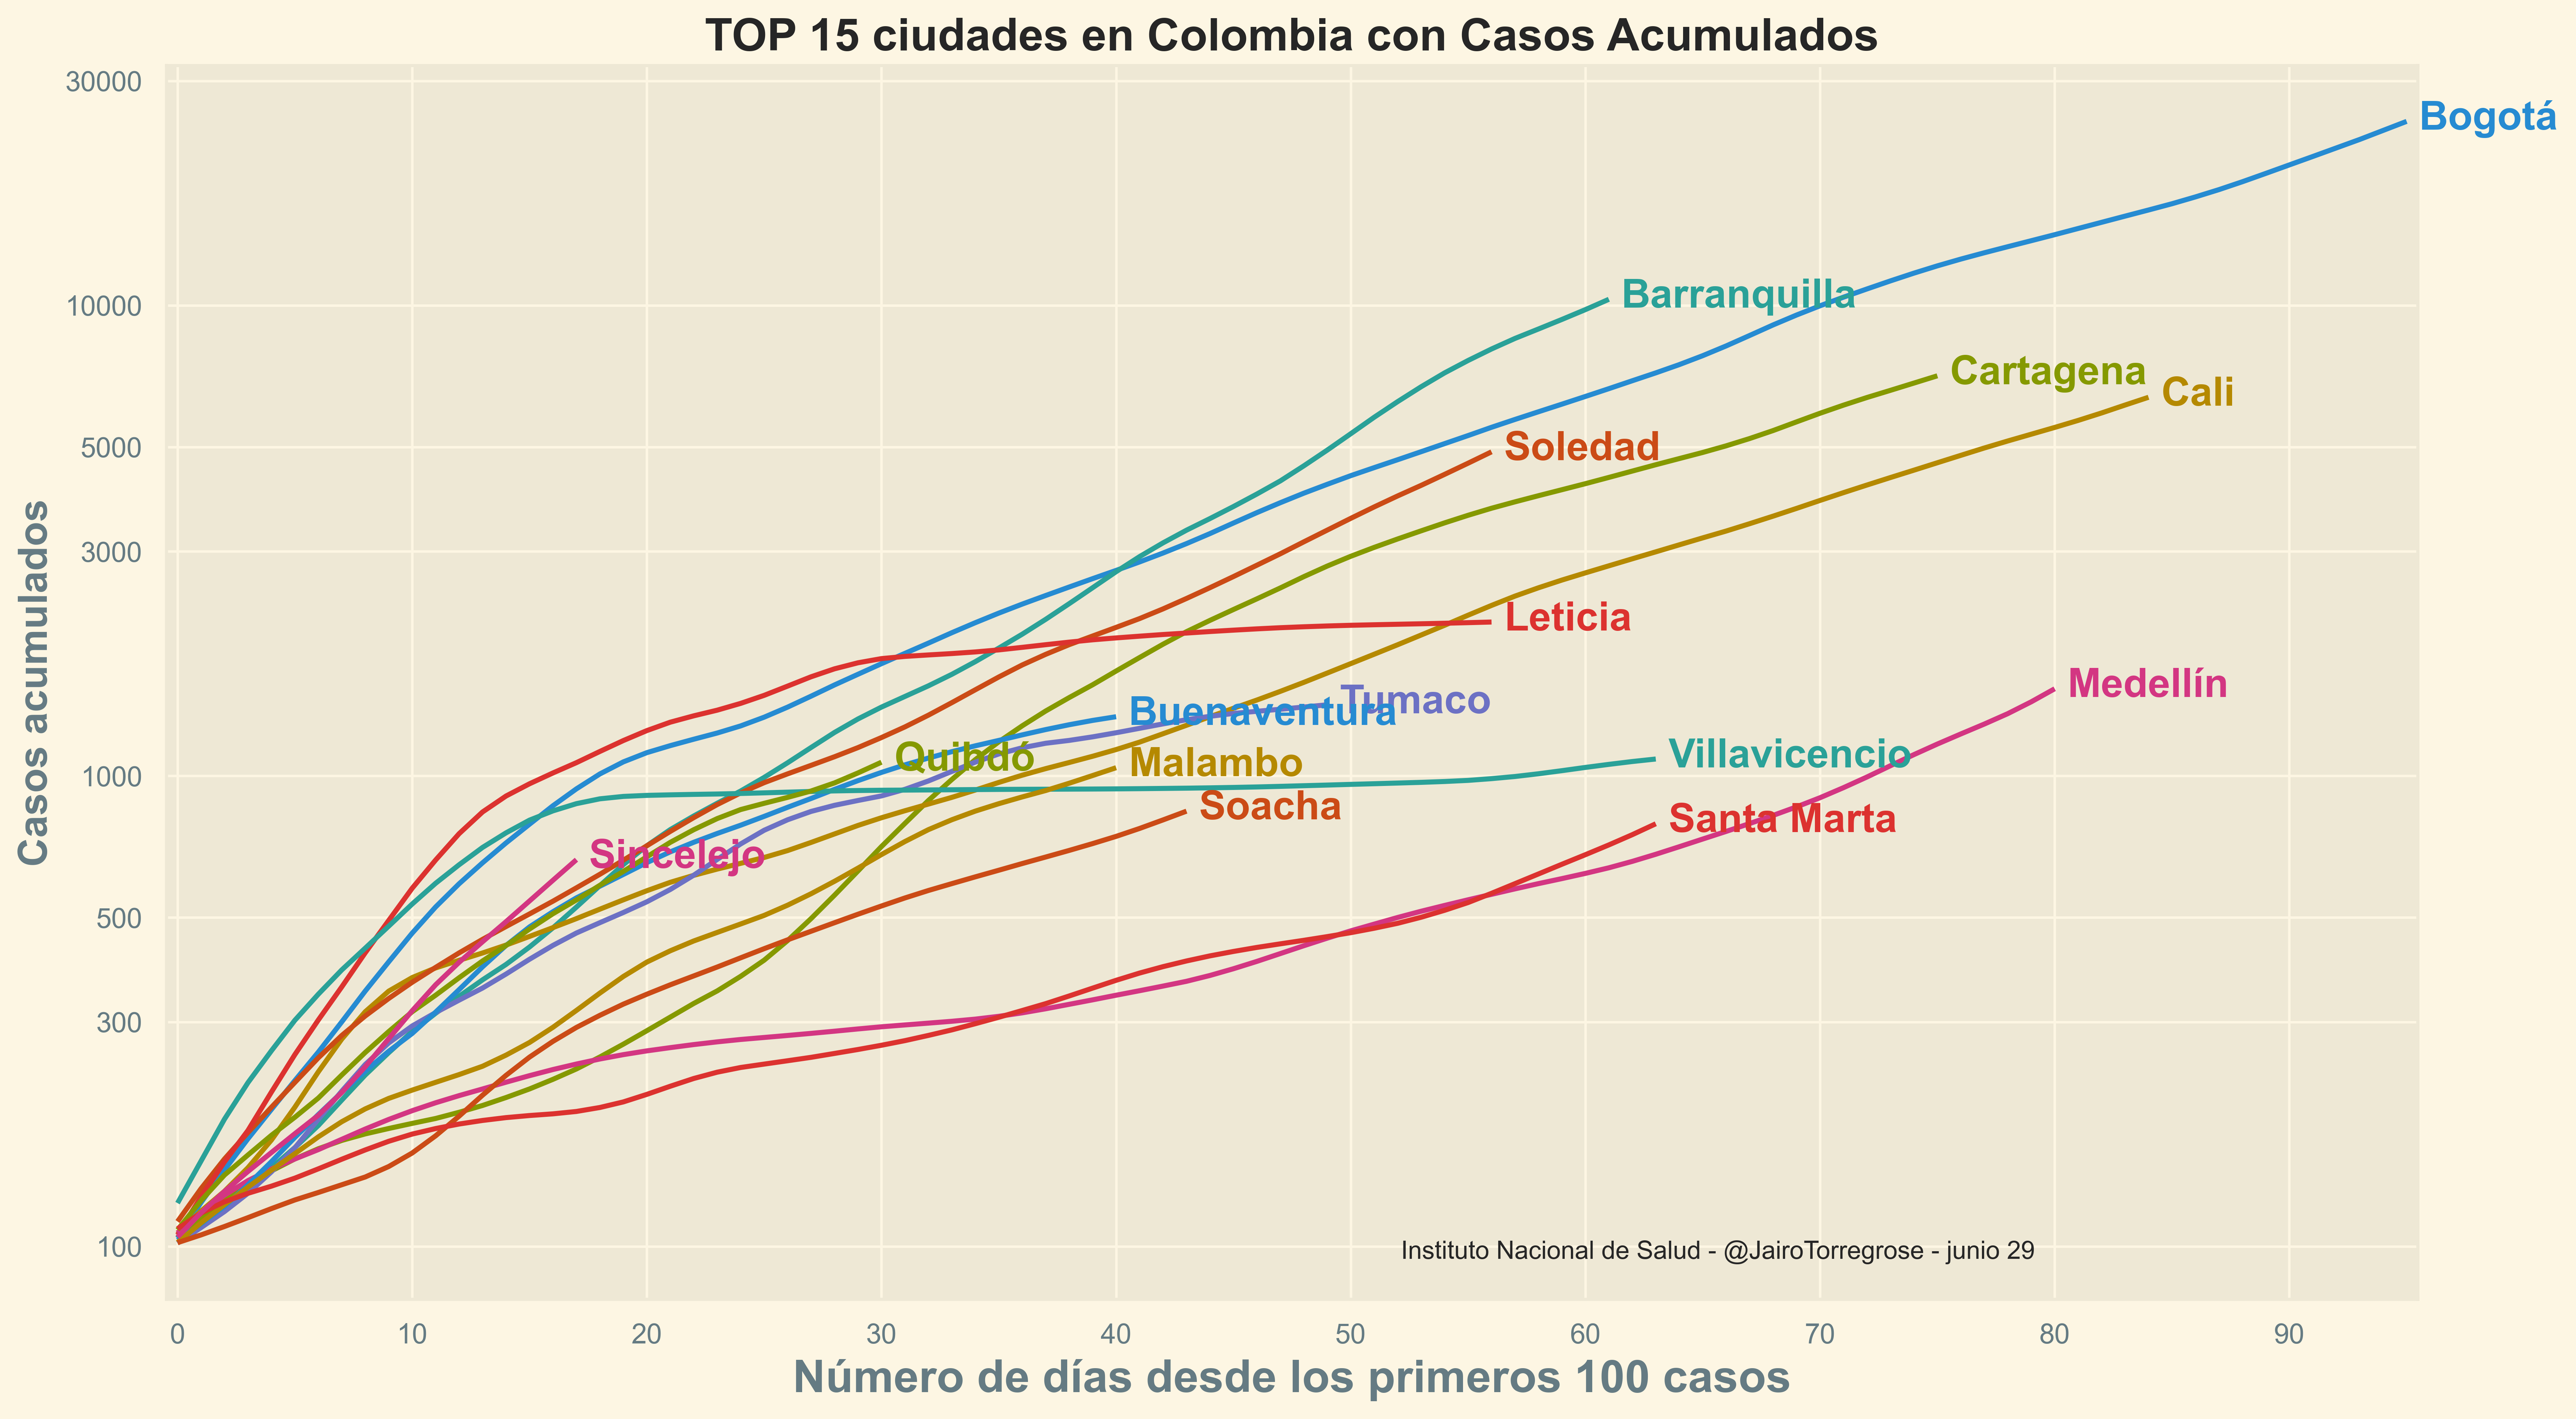

In [92]:
graficar(df_casos_acum, titulo_casos_acumulados,xlabel_casos_acumulados,ylabel_casos_acumulados ,texto_col)

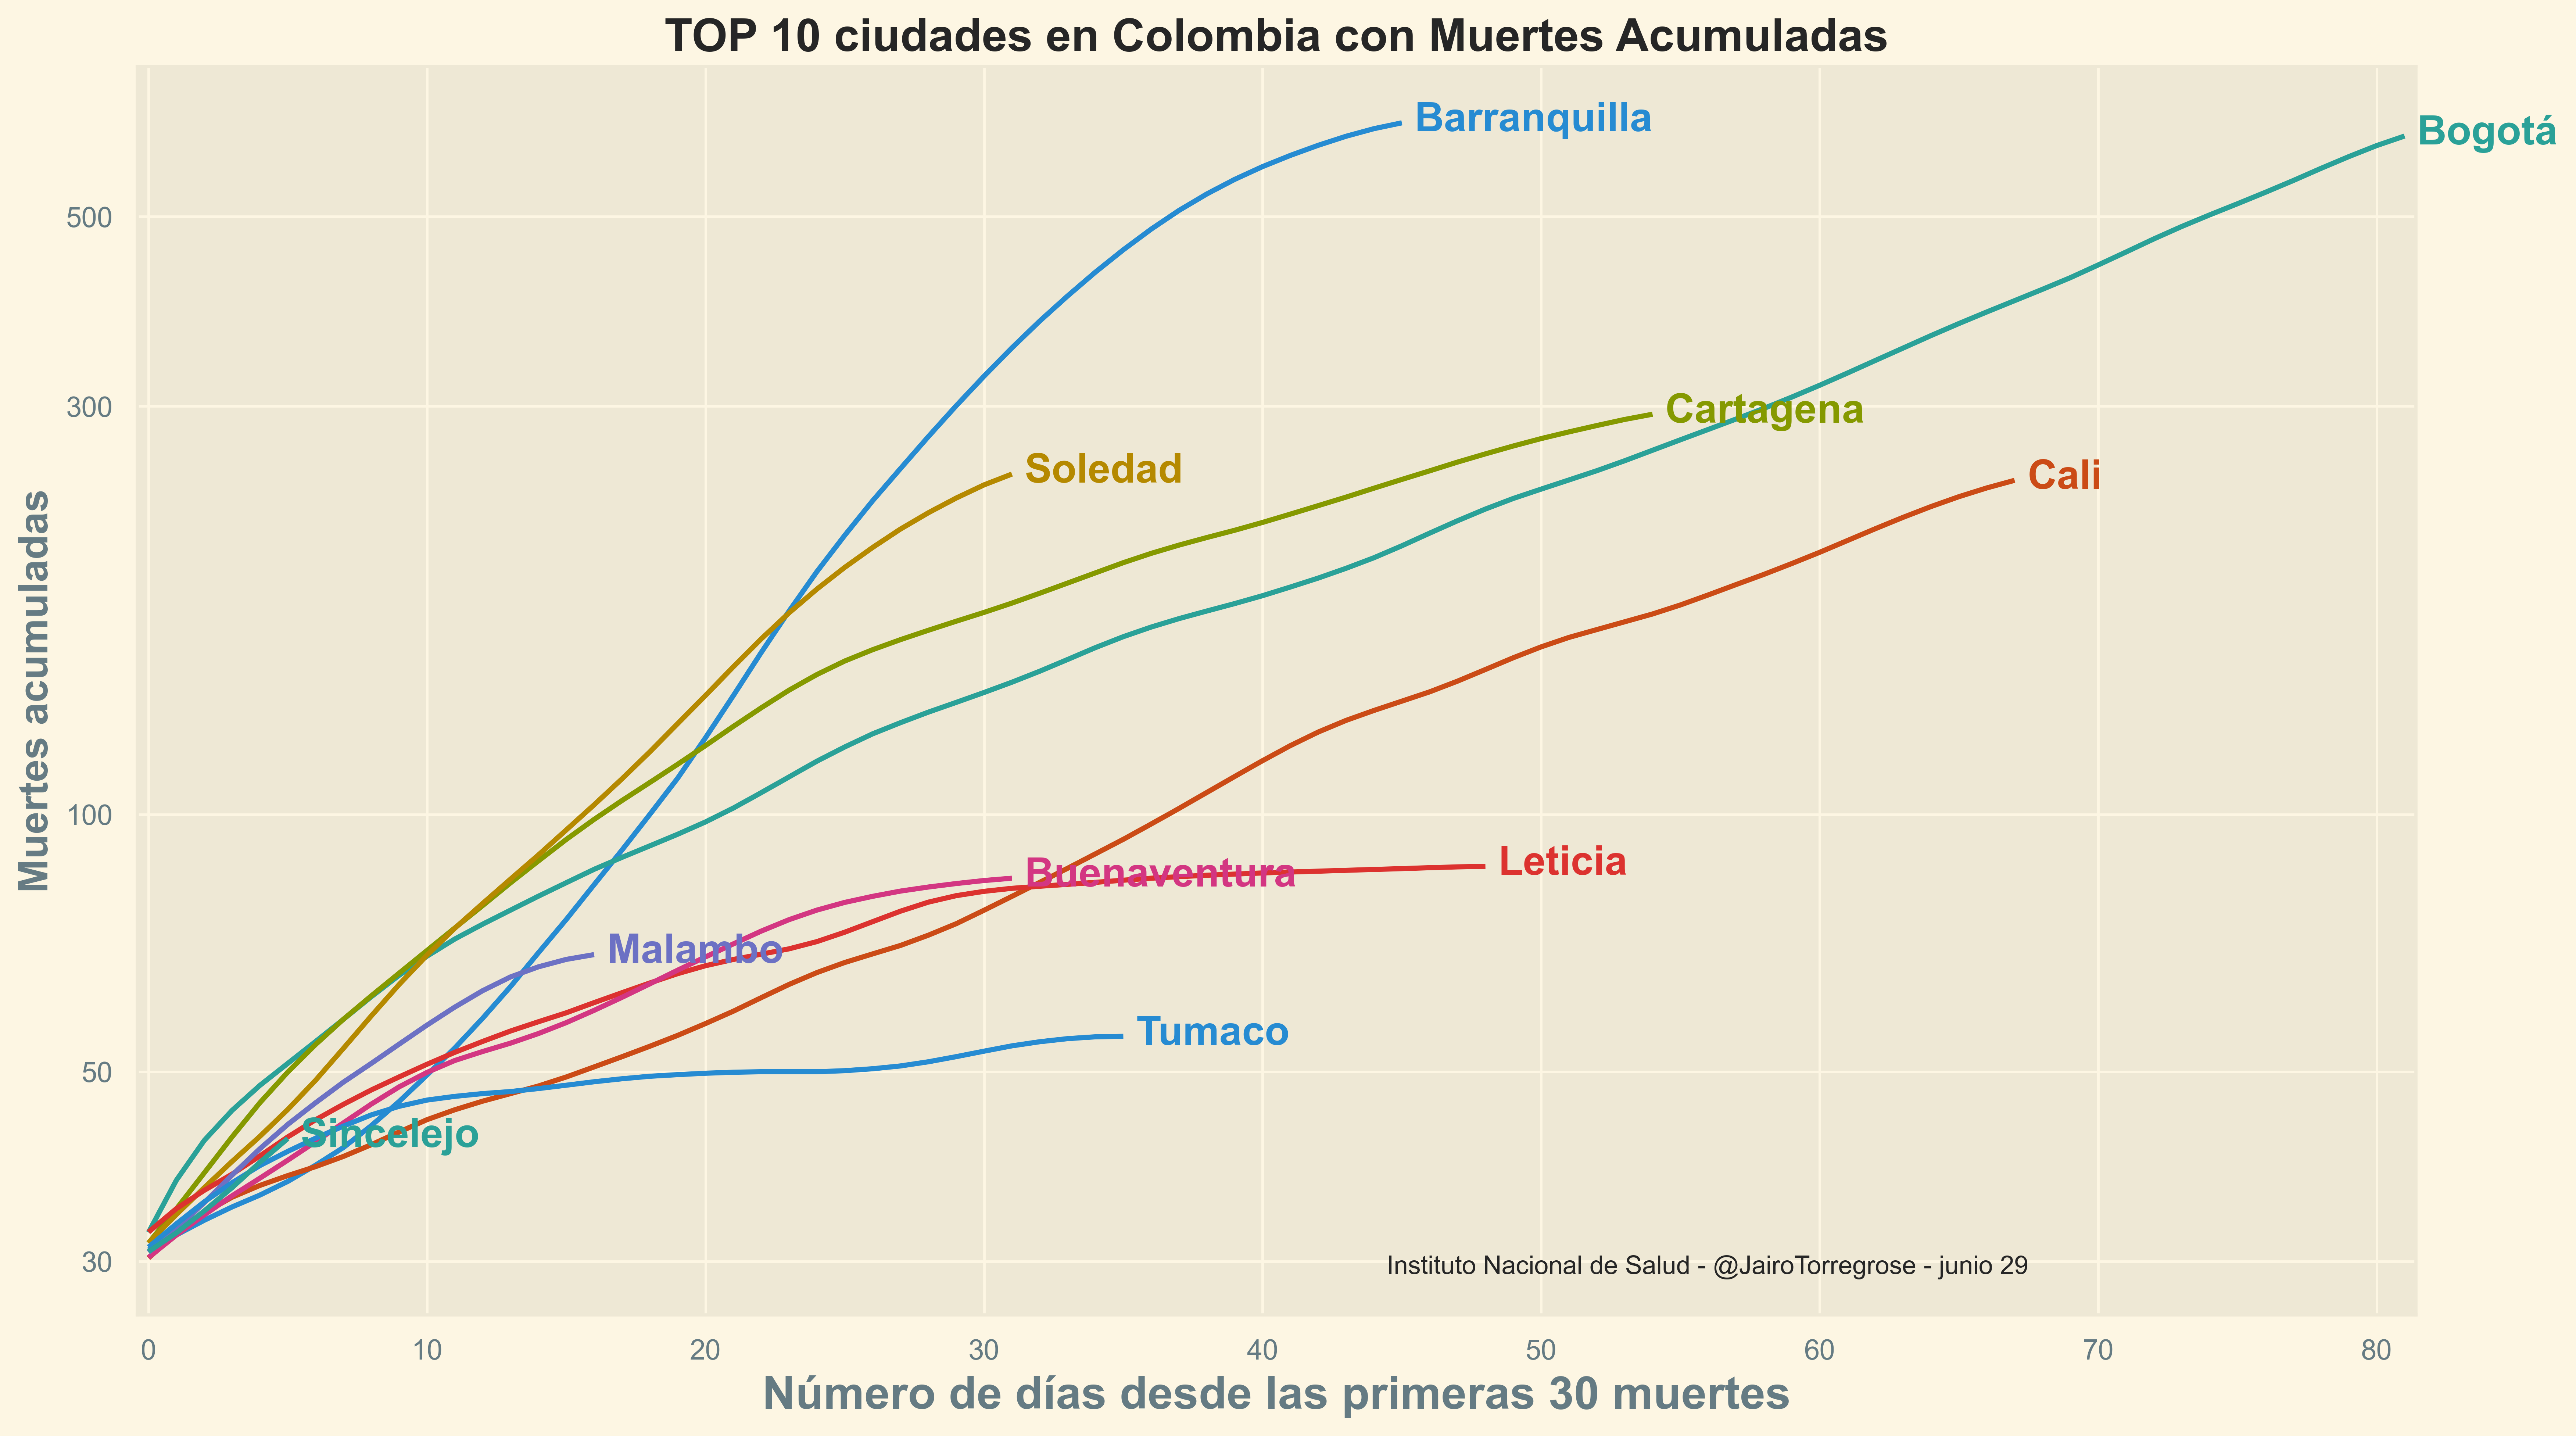

In [94]:
graficar(df_muertes_acum, titulo_muertes_acumuladas,xlabel_muertes_acumuladas,ylabel_muertes_acumuladas,texto_col)

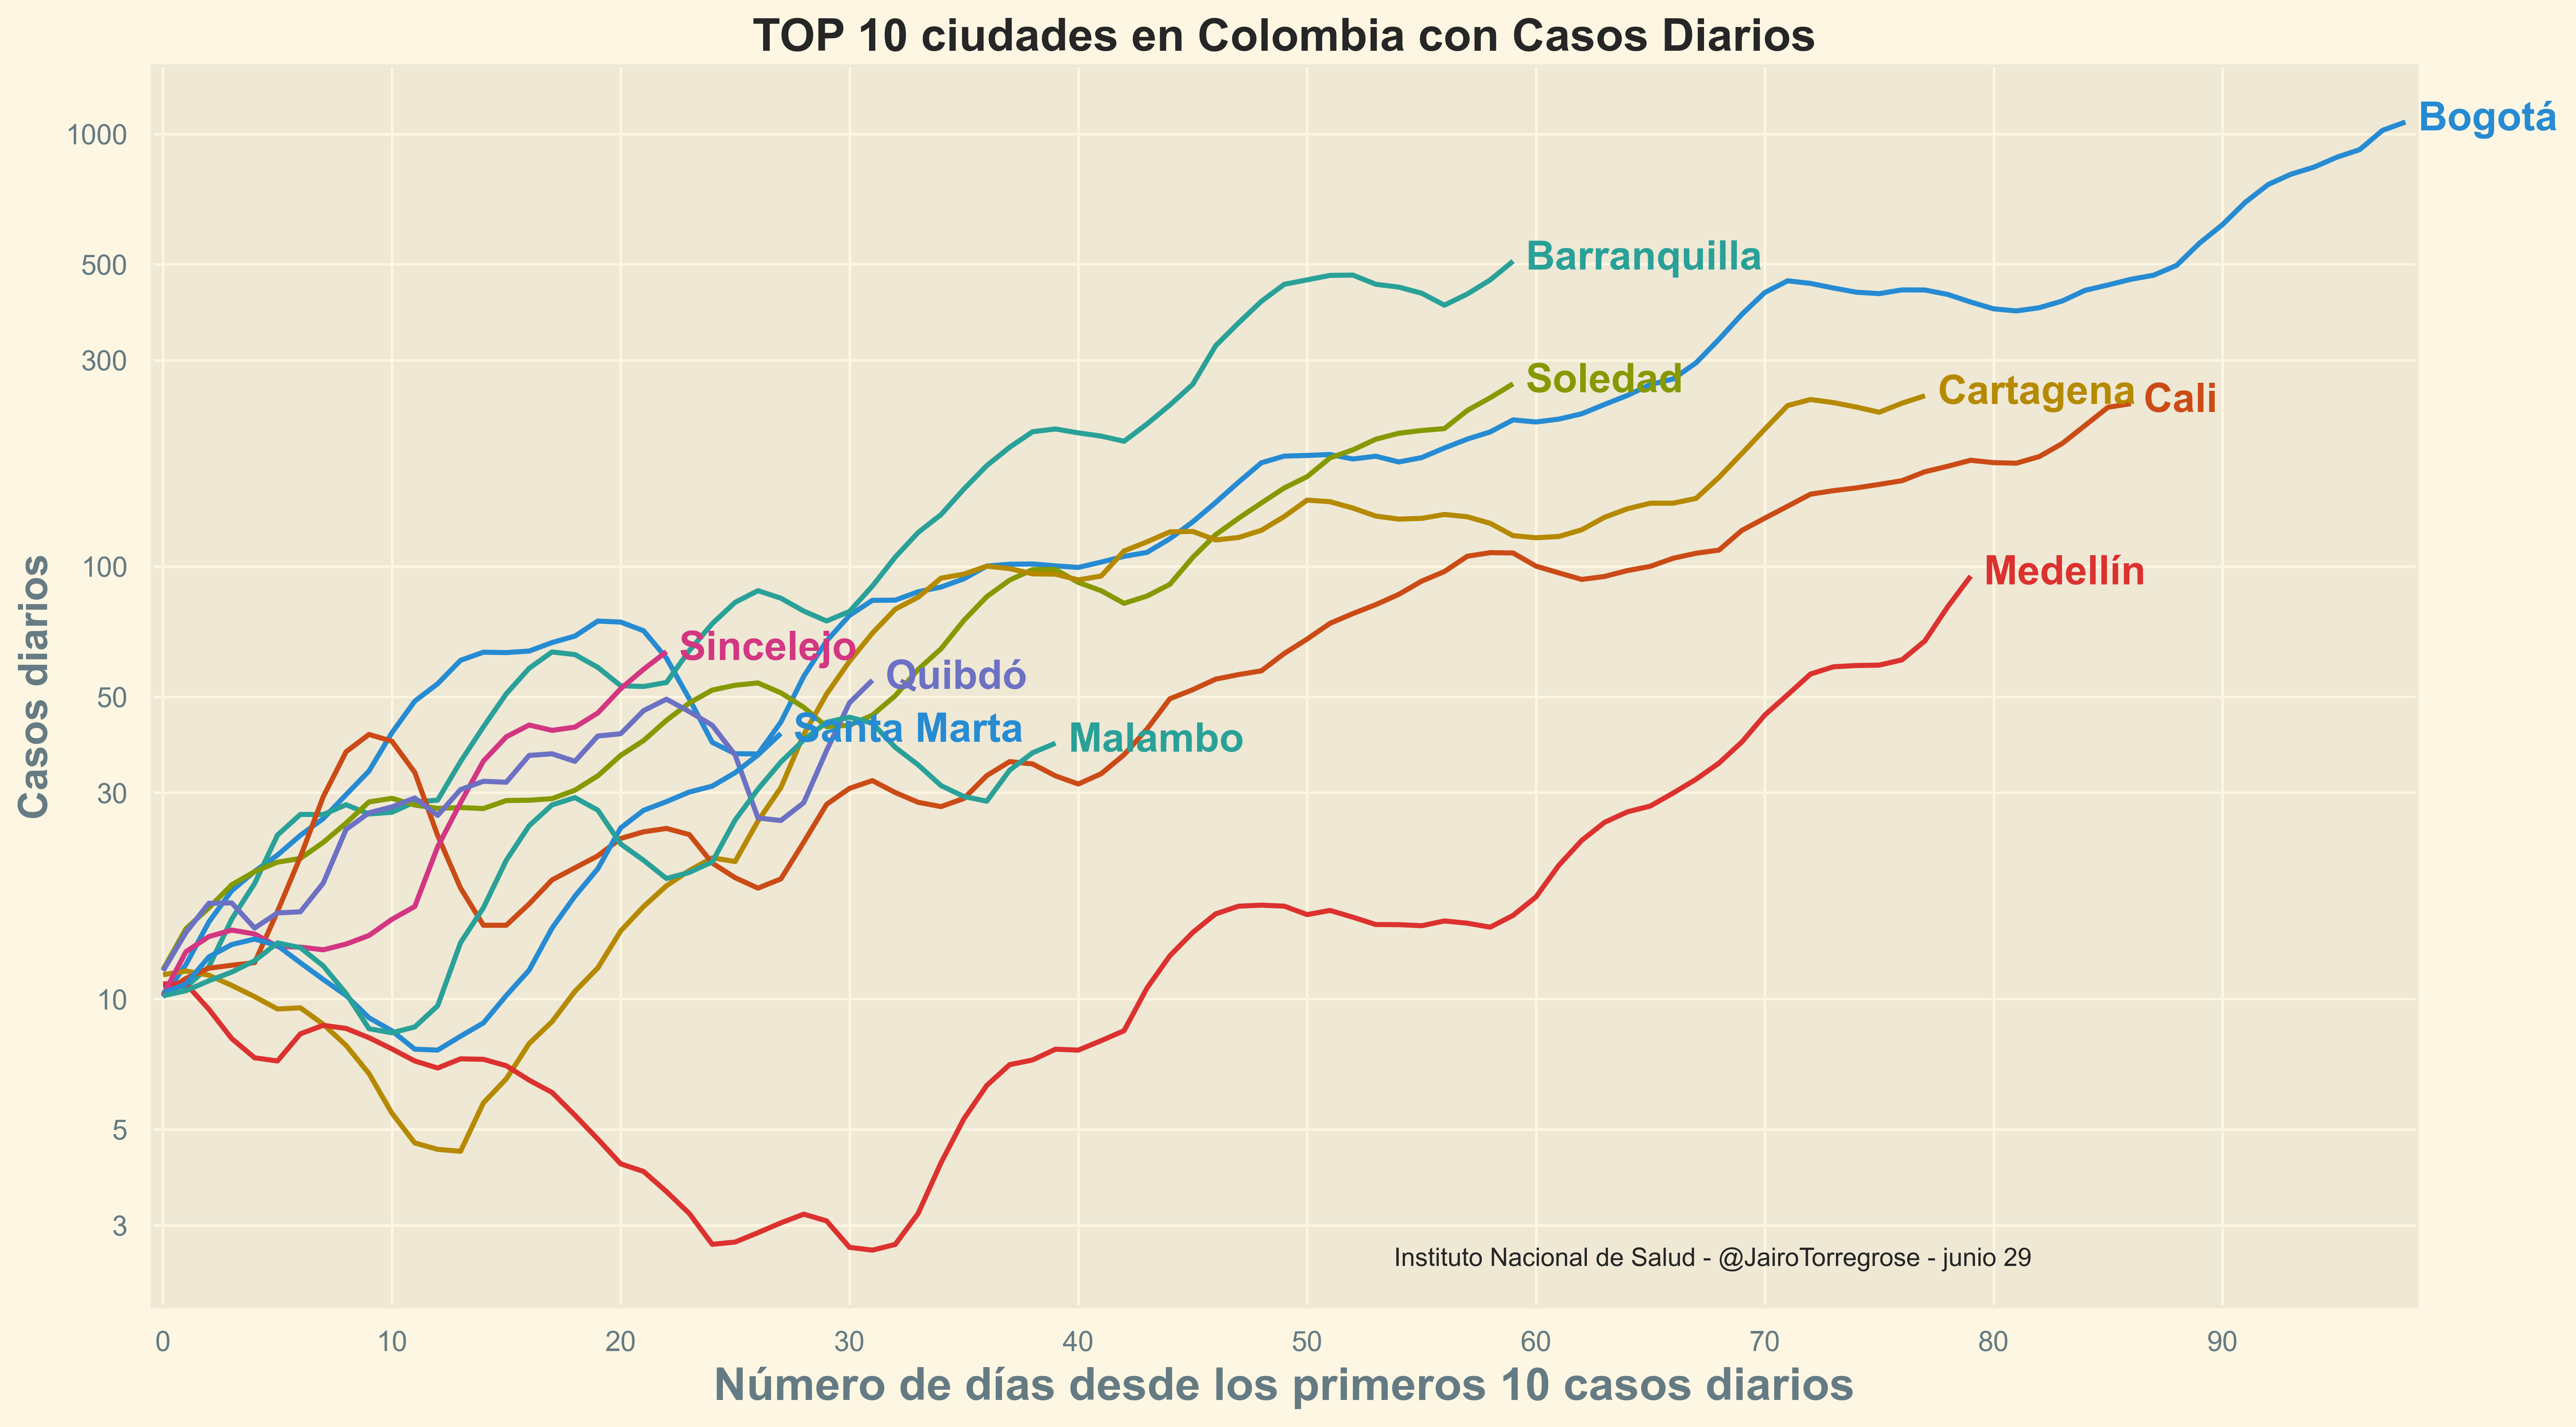

In [96]:
graficar(df_casos_diarios, titulo_casos_diarios, xlabel_casos_diarios, ylabel_casos_diarios,texto_col)

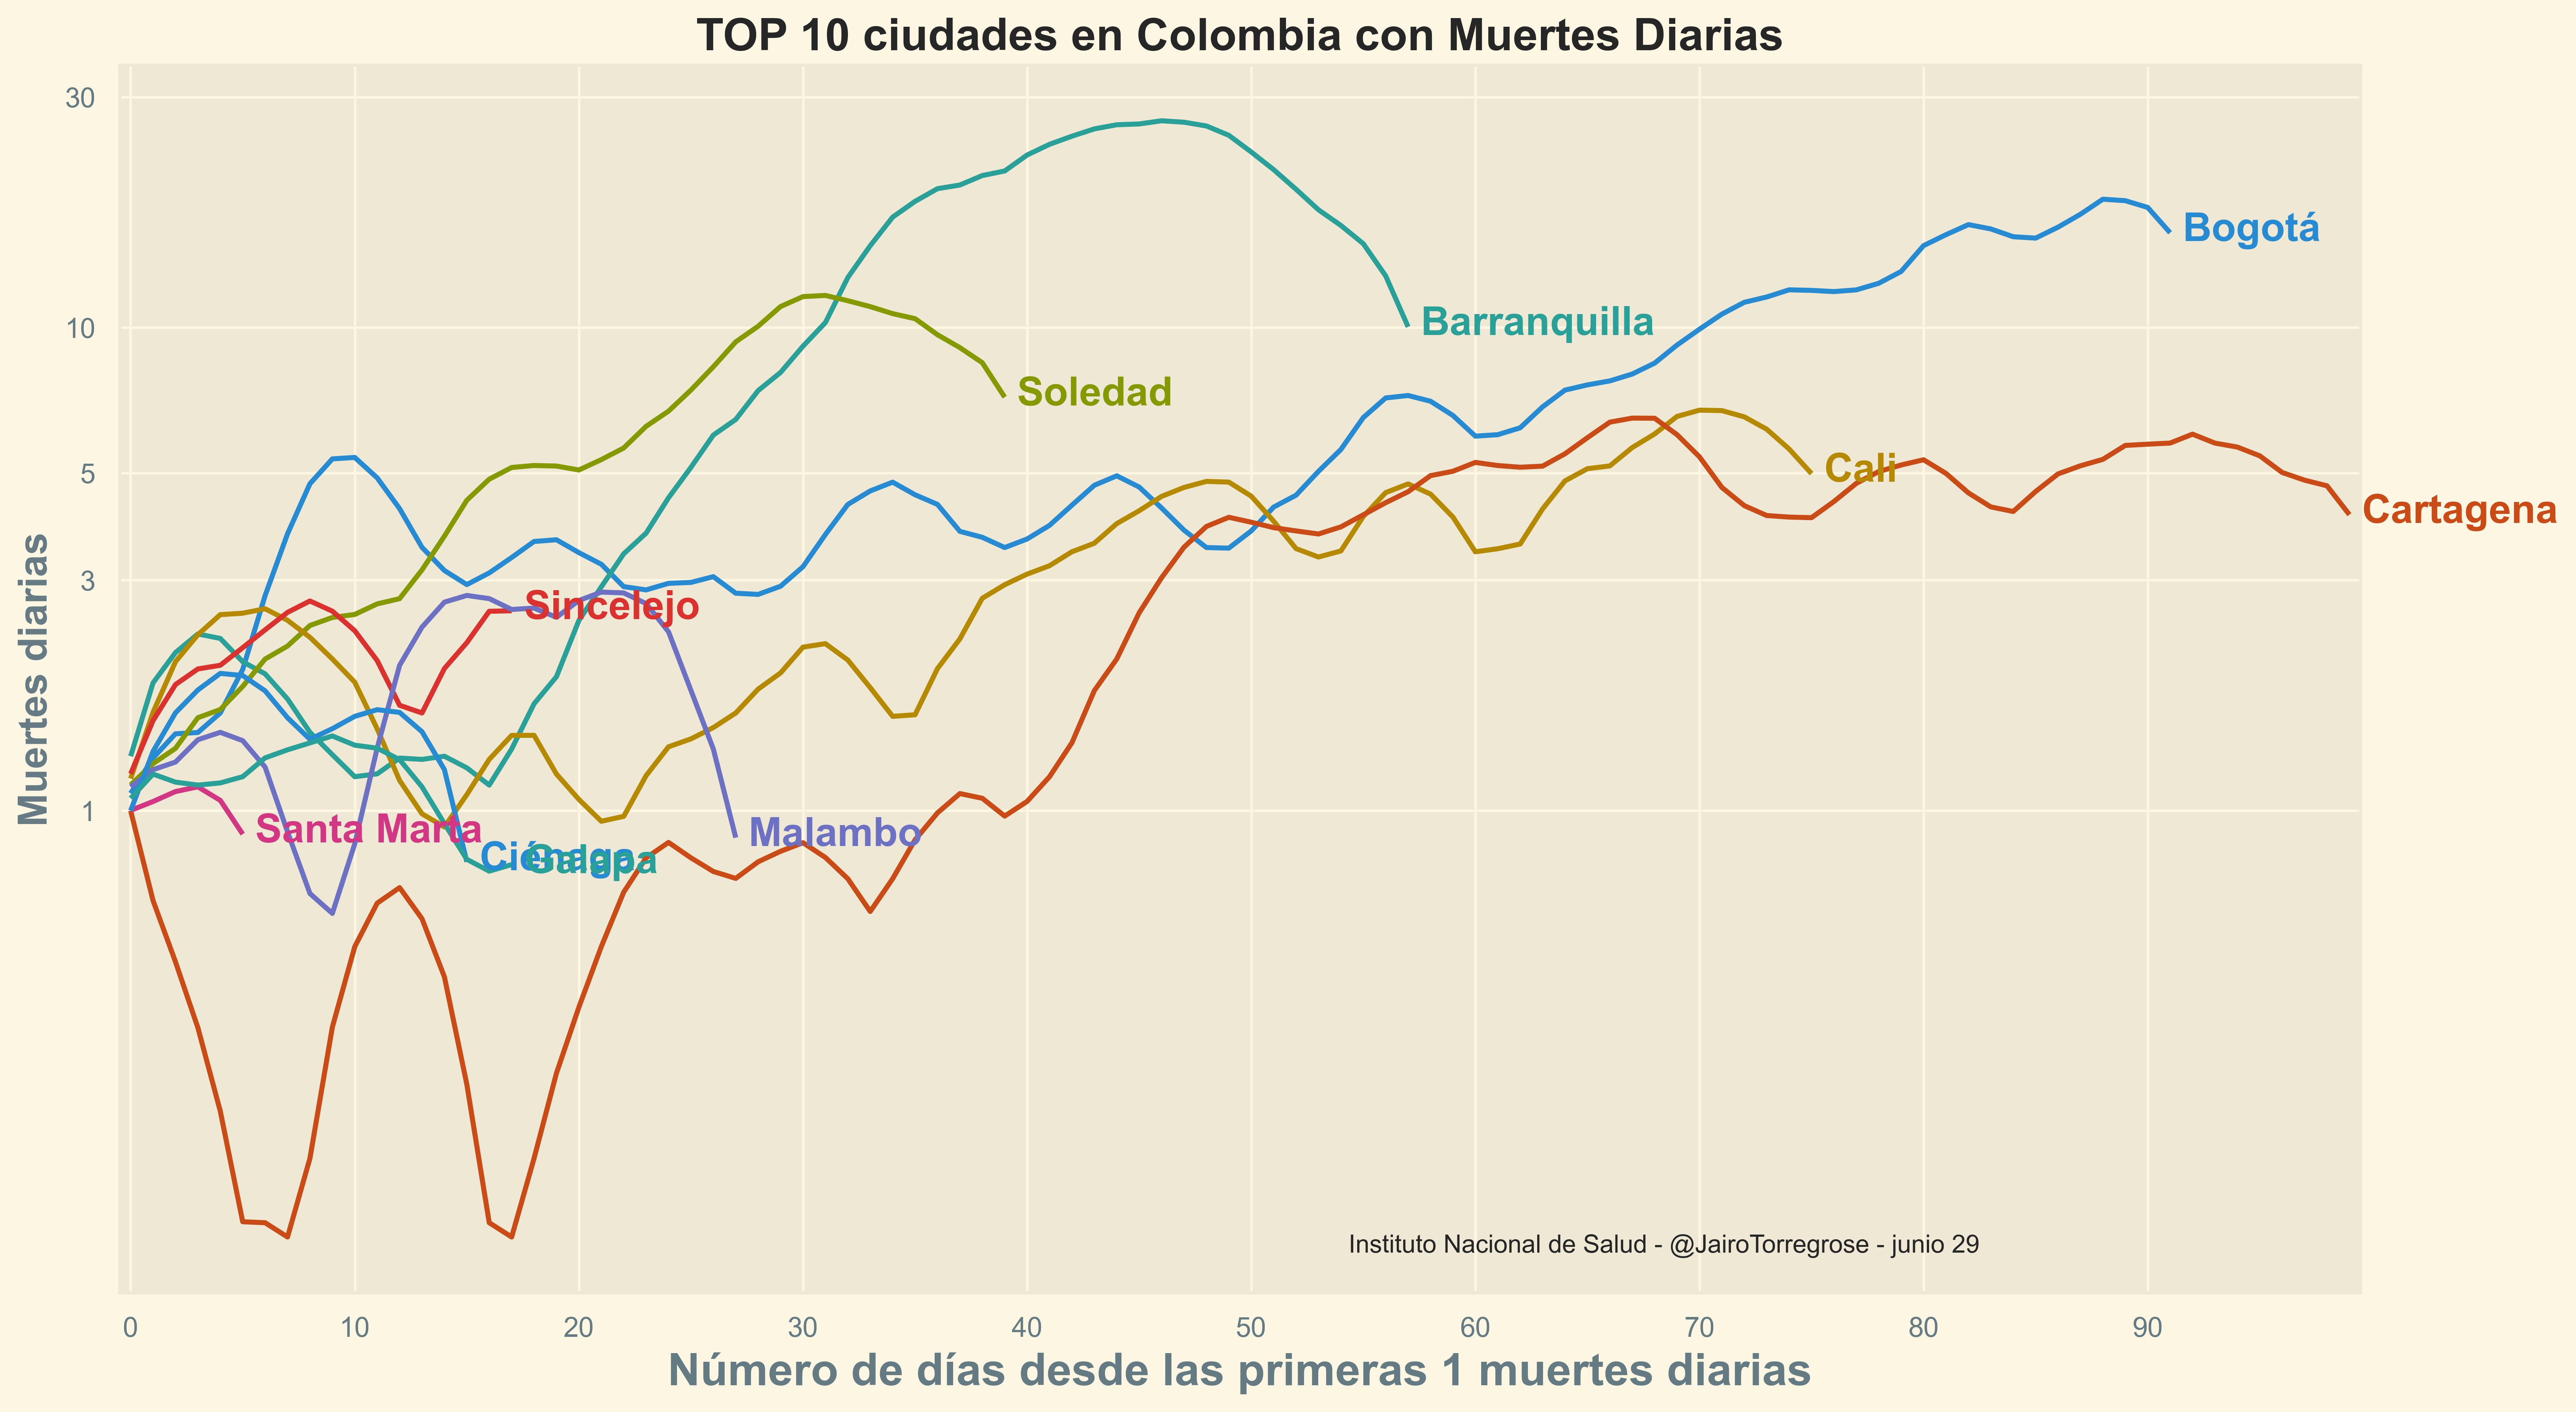

In [98]:
graficar(df_muertes_diarias, titulo_muertes_diarias, xlabel_muertes_diarias, ylabel_muertes_diarias,texto_col)

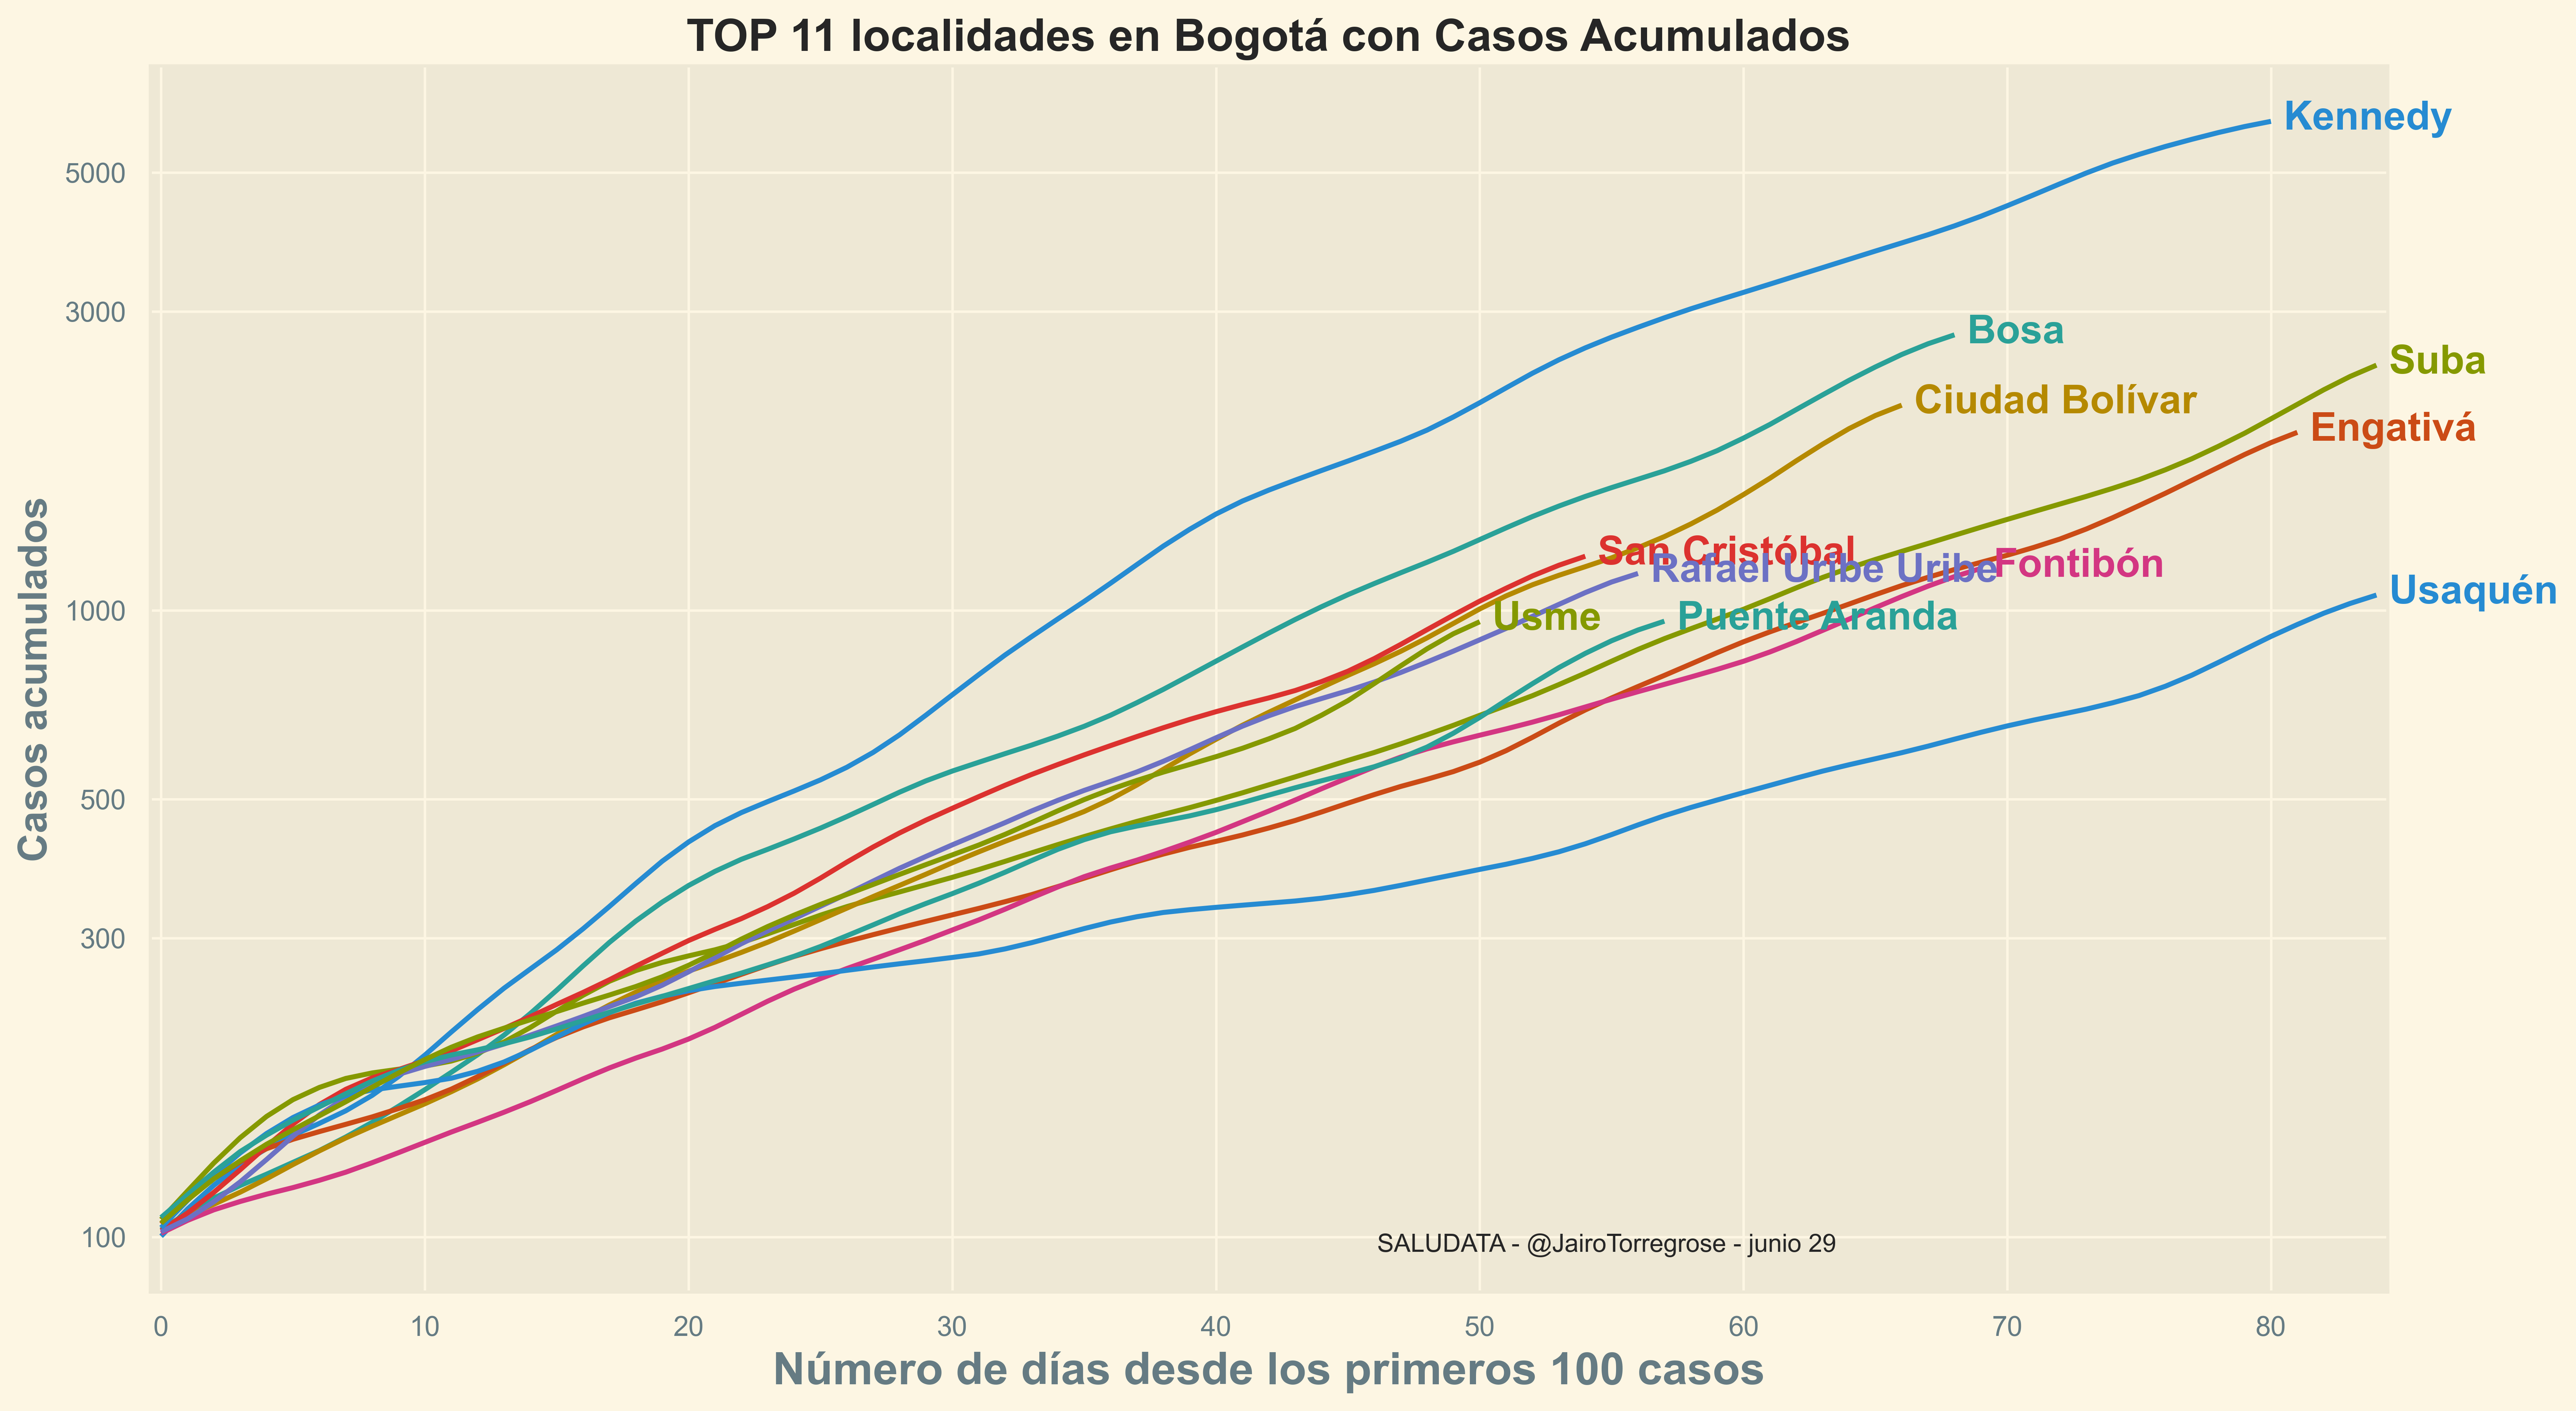

In [100]:
graficar(df_bog_casos_acu, titulo_acu, xlabel_acu, ylabel_acu ,texto_bog)

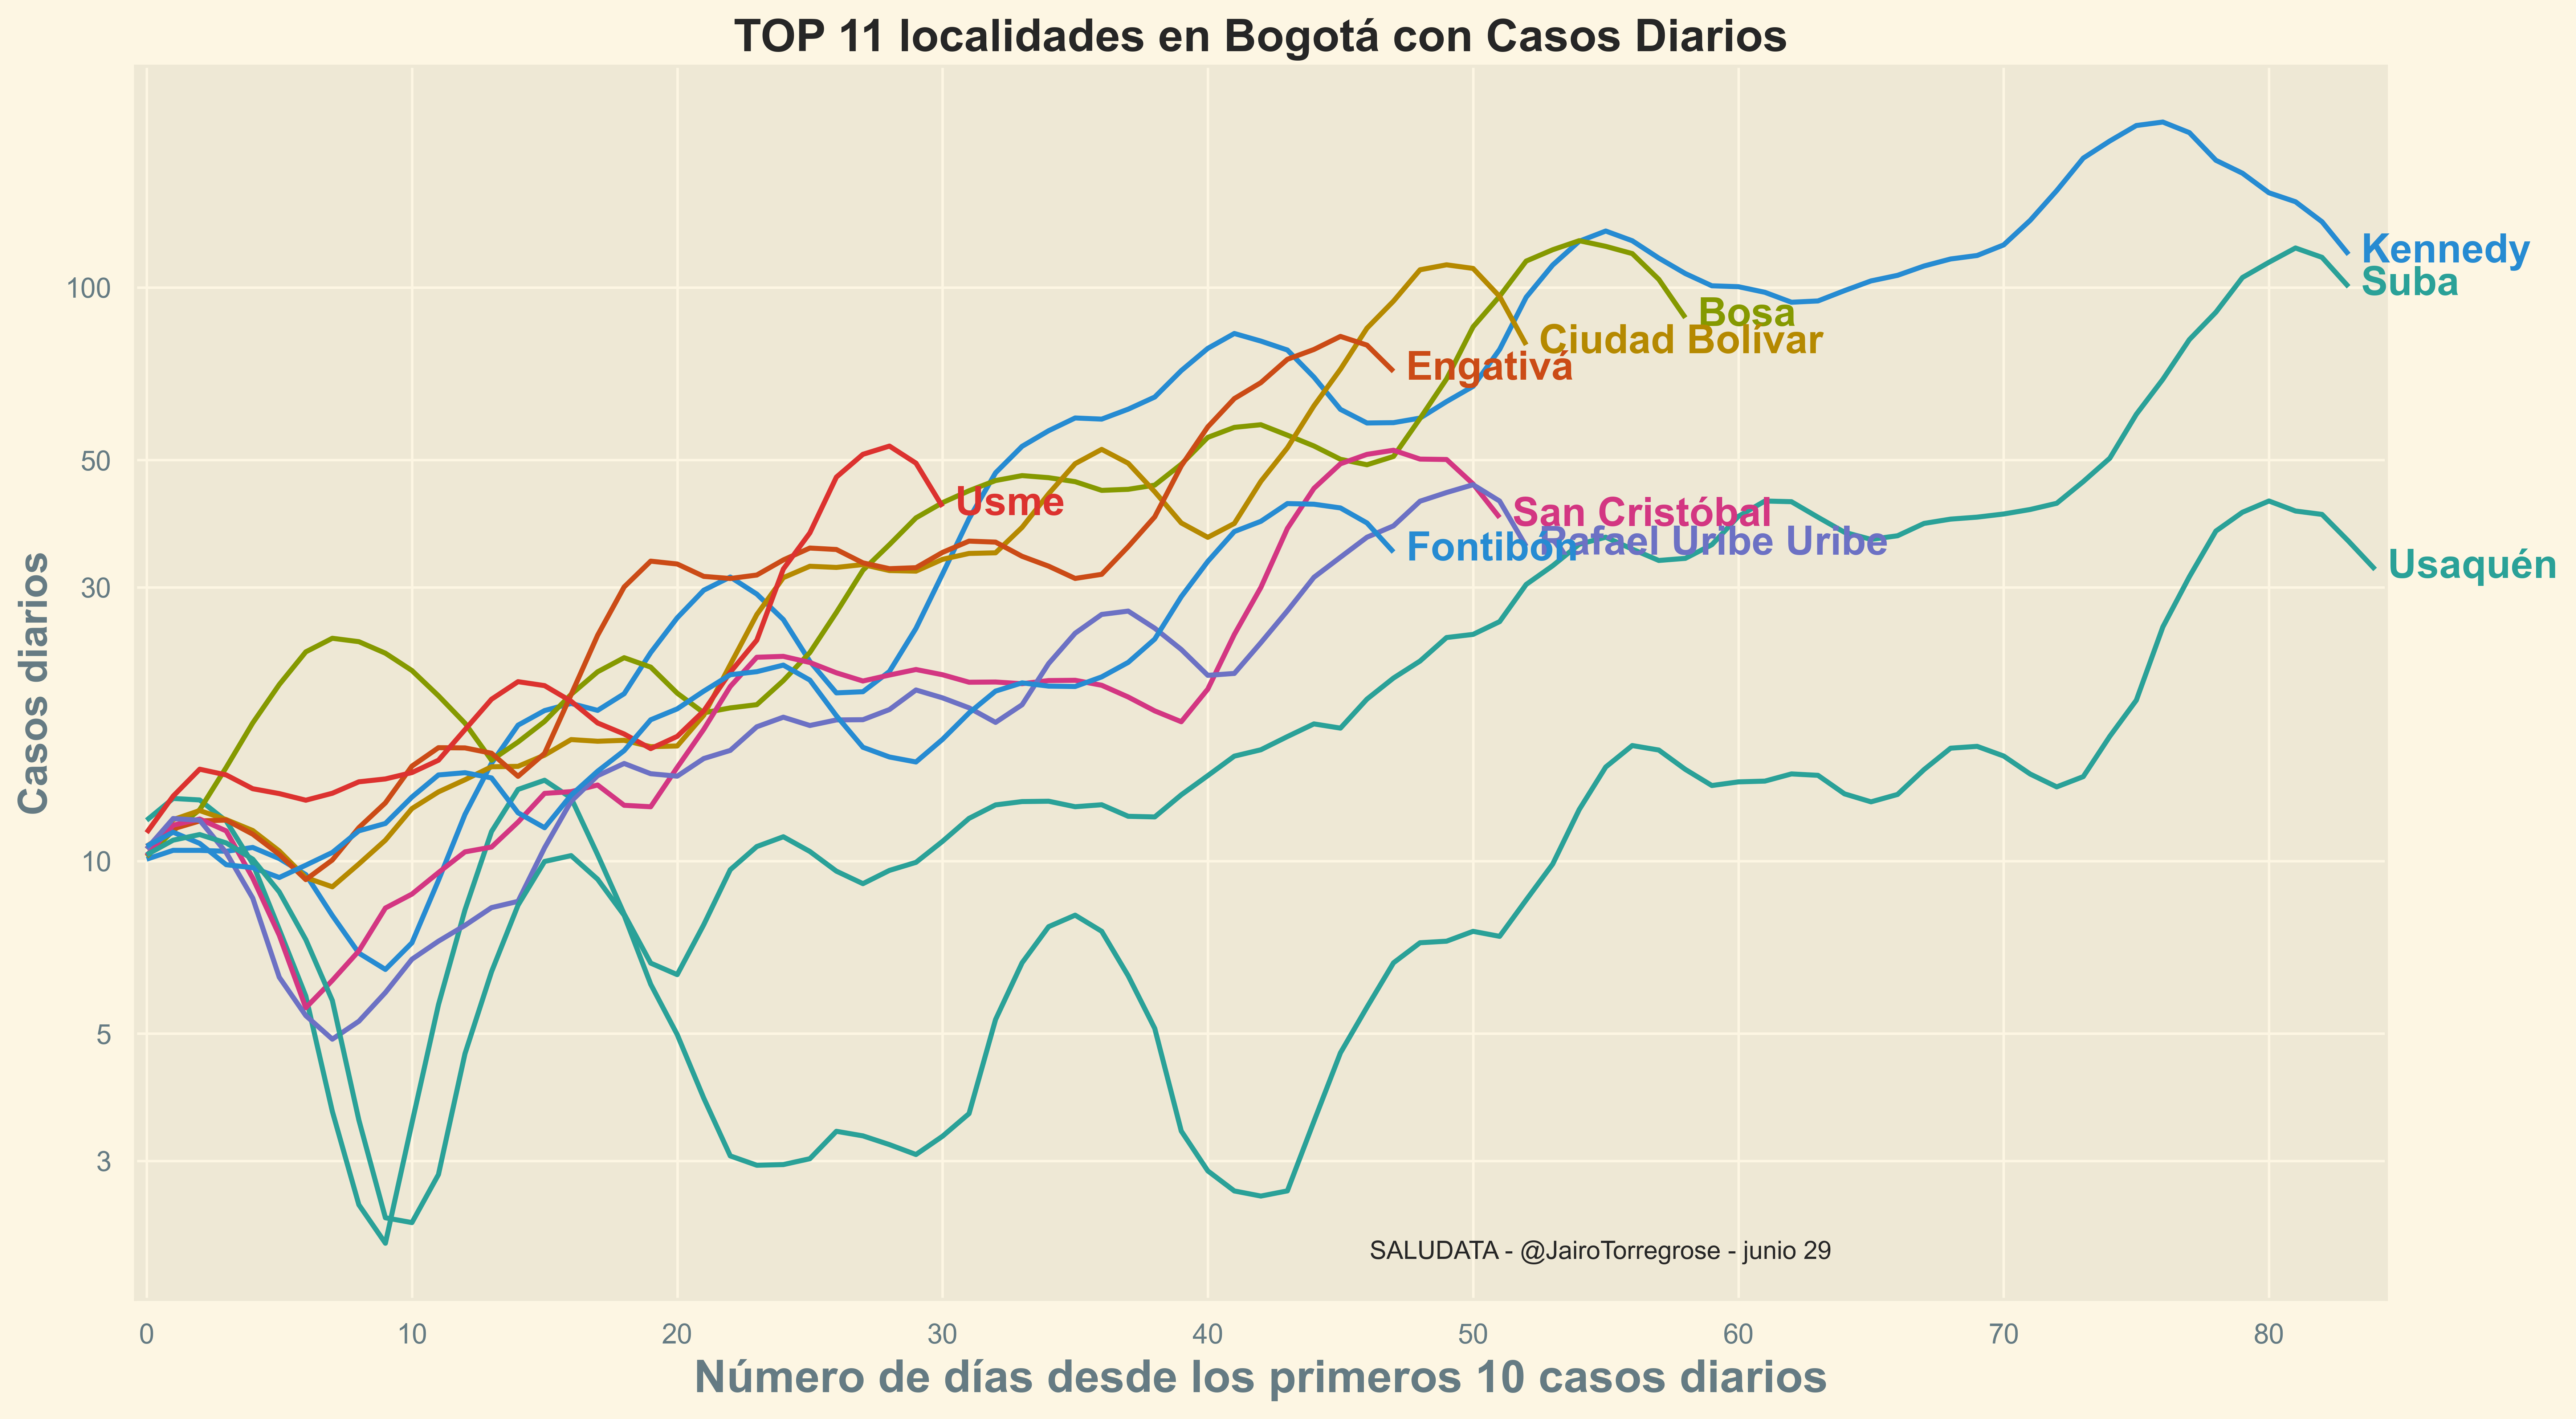

In [102]:
graficar(df_bog_casos, titulo_diarios, xlabel_diarios, ylabel_diarios , texto_bog)